# Task 1: Histogram equalization

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import title

In [2]:
IMAGES_FOLDER = os.path.join(".", "images")

In [3]:
def get_grayscale_image_histogram(image):
    return np.array(cv2.calcHist([image], [0], None, [256], [0, 256]))

In [4]:
def plot_grayscale_image(image, title):
    plt.imshow(image, cmap="gray")
    plt.title(os.path.basename(title))
    plt.axis("off")
    plt.show()

In [5]:
def plot_grayscale_histogram(hist, title):
    plt.figure(figsize=(8, 4))
    plt.plot(hist, color="black")
    plt.title(title)
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.xlim([0, 255])
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

In [6]:
def show_grayscale_equalization_hist_comparison(image, title, hist_equalization_fn):
    equalized_image = hist_equalization_fn(image)

    hist_original = get_grayscale_image_histogram(image)
    hist_equalized = get_grayscale_image_histogram(equalized_image)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    fig.suptitle(title, fontsize=14)

    axes[0, 0].imshow(image, cmap="gray")
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

    axes[0, 1].plot(hist_original, color="black")
    axes[0, 1].set_title("Original histogram")

    axes[1, 0].imshow(equalized_image, cmap="gray")
    axes[1, 0].set_title("Equalized image")
    axes[1, 0].axis("off")

    axes[1, 1].plot(hist_equalized, color="black")
    axes[1, 1].set_title("Equalized Histogram")

    plt.tight_layout()
    plt.show()

### Histogram equalization

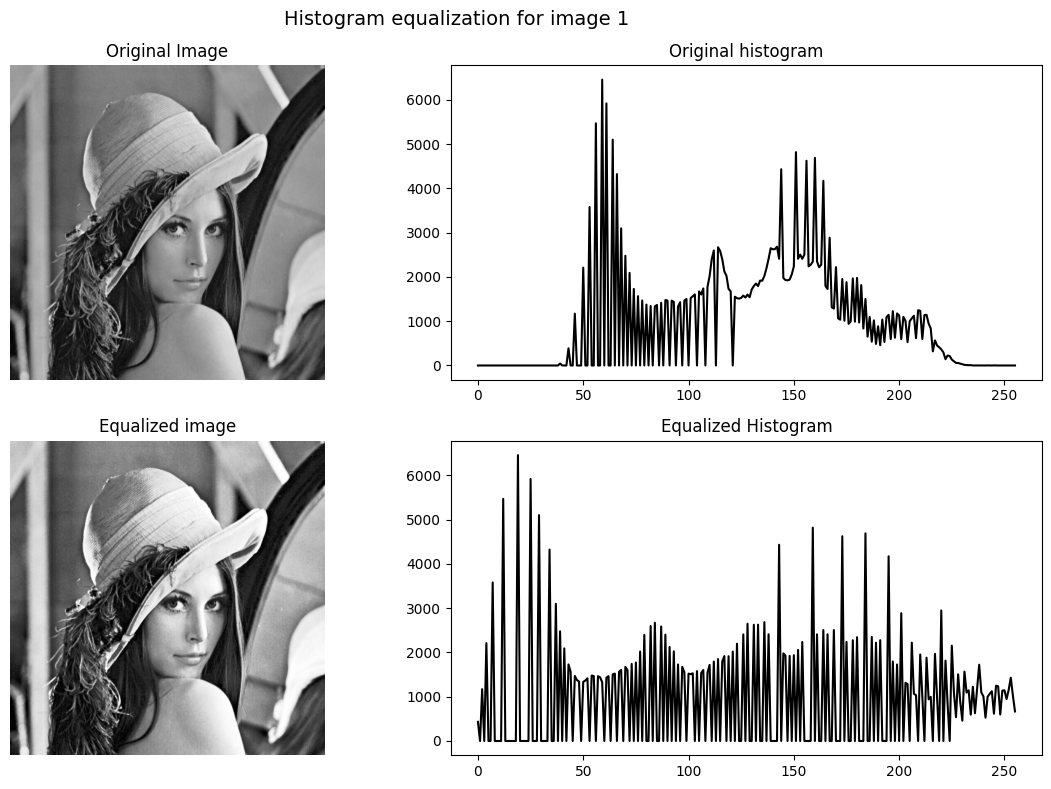

In [7]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_1_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(image, title="Histogram equalization for image 1", hist_equalization_fn=cv2.equalizeHist)

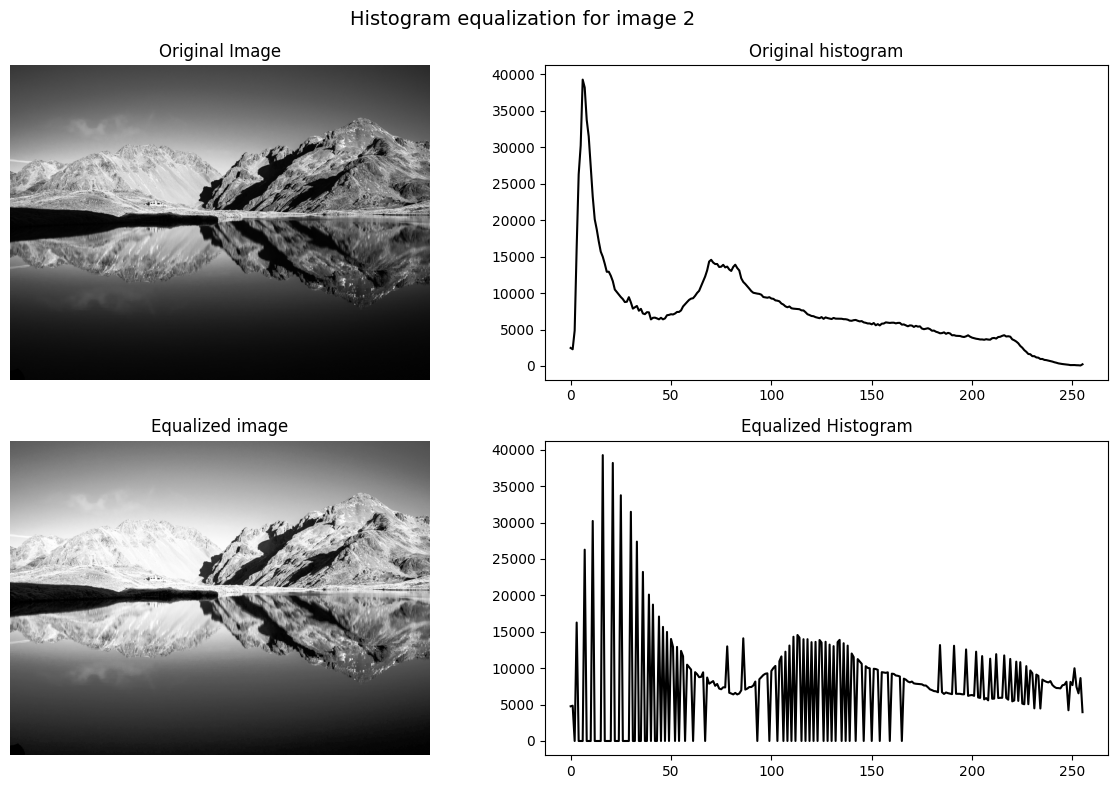

In [8]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_2_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(image, title="Histogram equalization for image 2", hist_equalization_fn=cv2.equalizeHist)

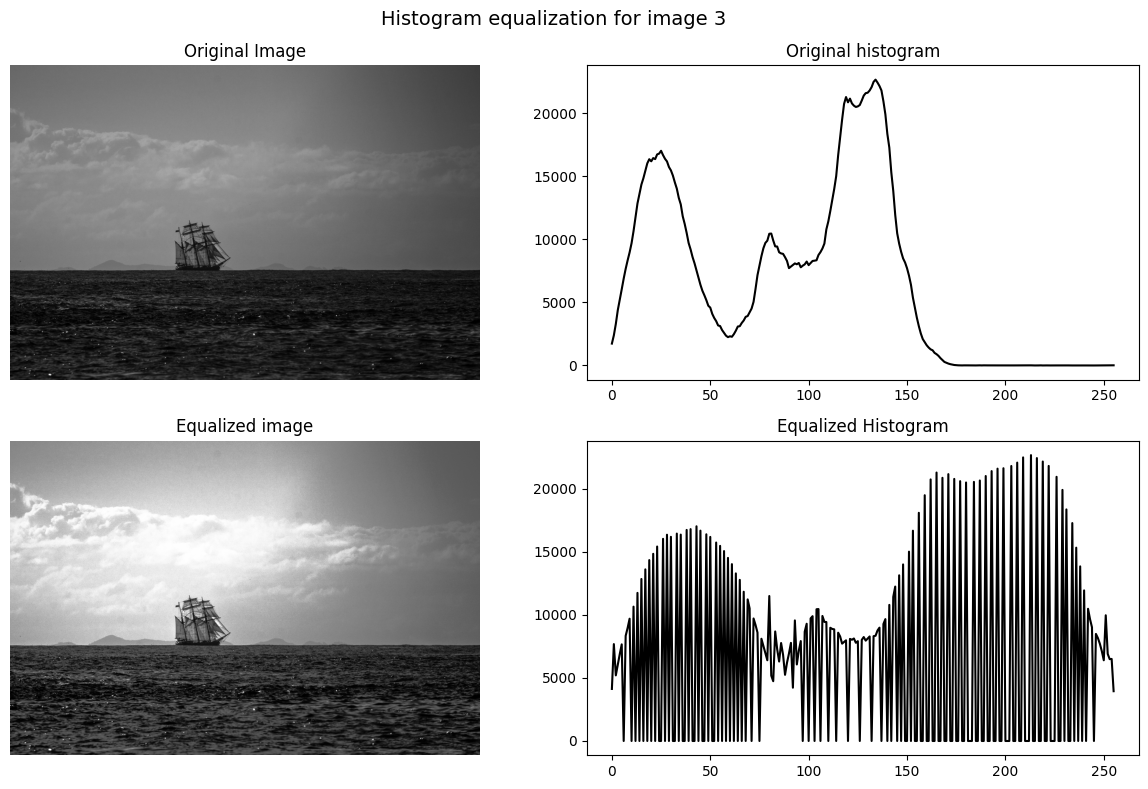

In [9]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_3_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(image, title="Histogram equalization for image 3", hist_equalization_fn=cv2.equalizeHist)

### CLAHE algorithm

In [14]:
def clahe_grayscale(image, clip_limit=2.0, tileGridSize=(8, 8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tileGridSize)
    
    return clahe.apply(image)

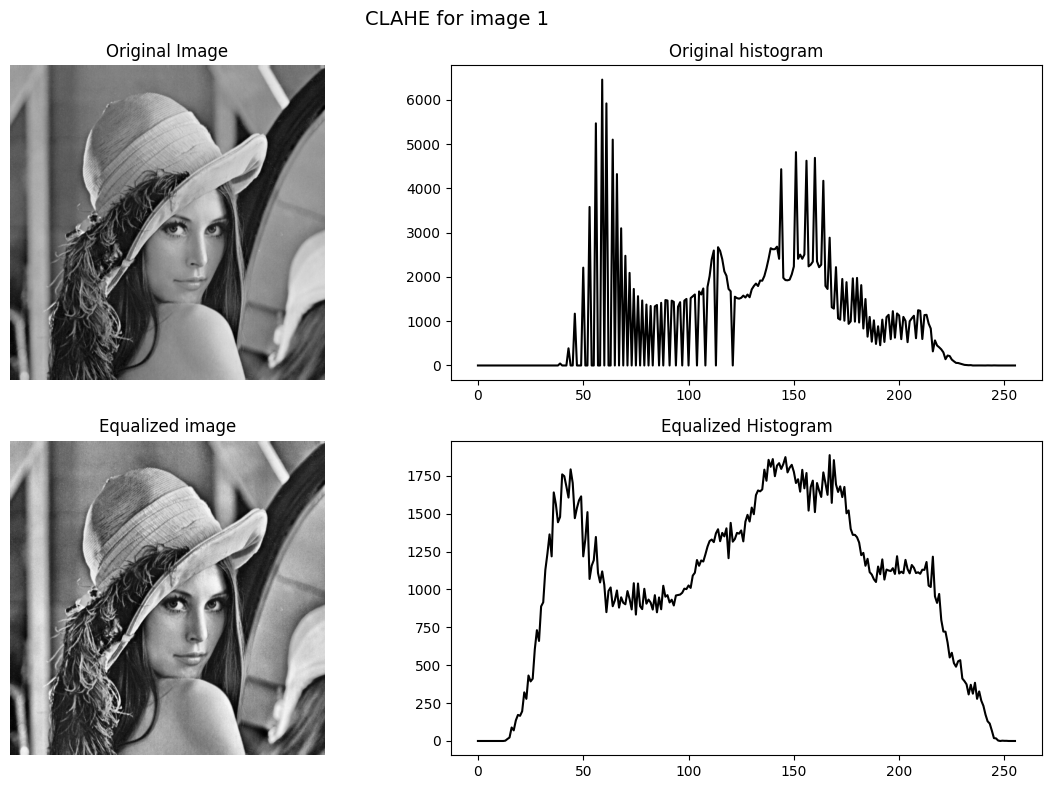

In [23]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_1_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(
    image,
    title="CLAHE for image 1",
    hist_equalization_fn=lambda img: clahe_grayscale(img, clip_limit=2.0, tileGridSize=(8, 8))
)

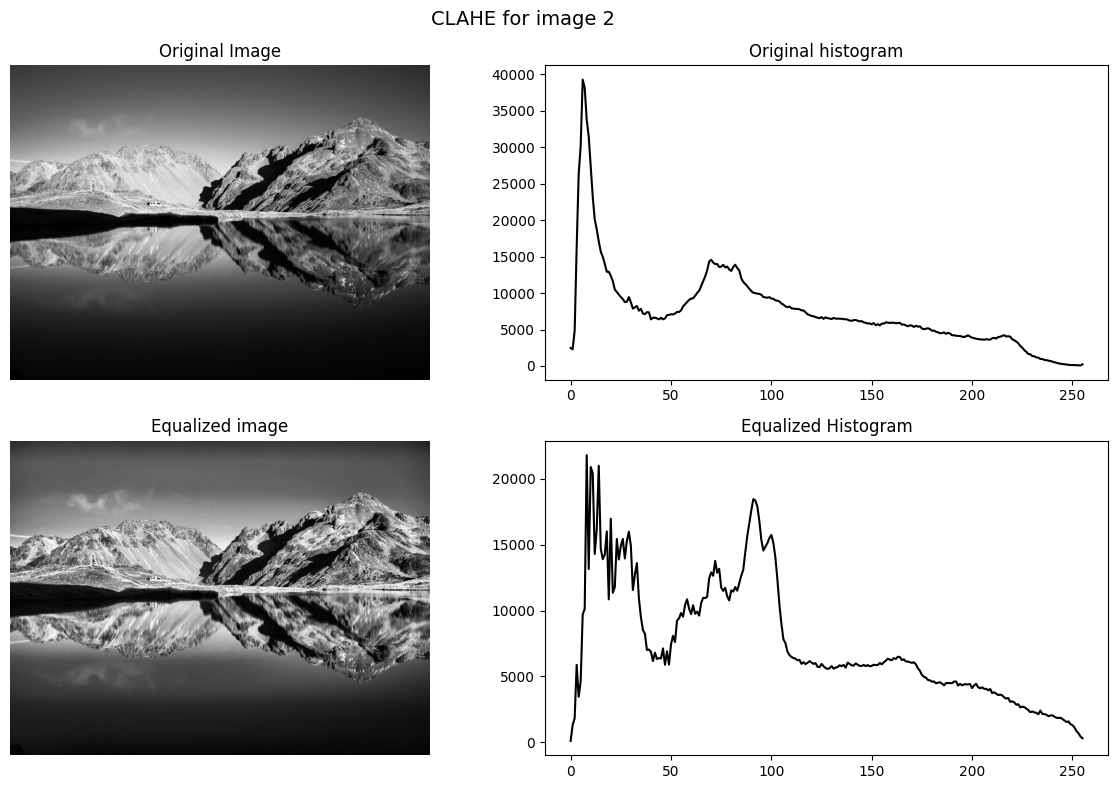

In [24]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_2_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(
    image,
    title="CLAHE for image 2",
    hist_equalization_fn=lambda img: clahe_grayscale(img, clip_limit=2.0, tileGridSize=(8, 8))
)

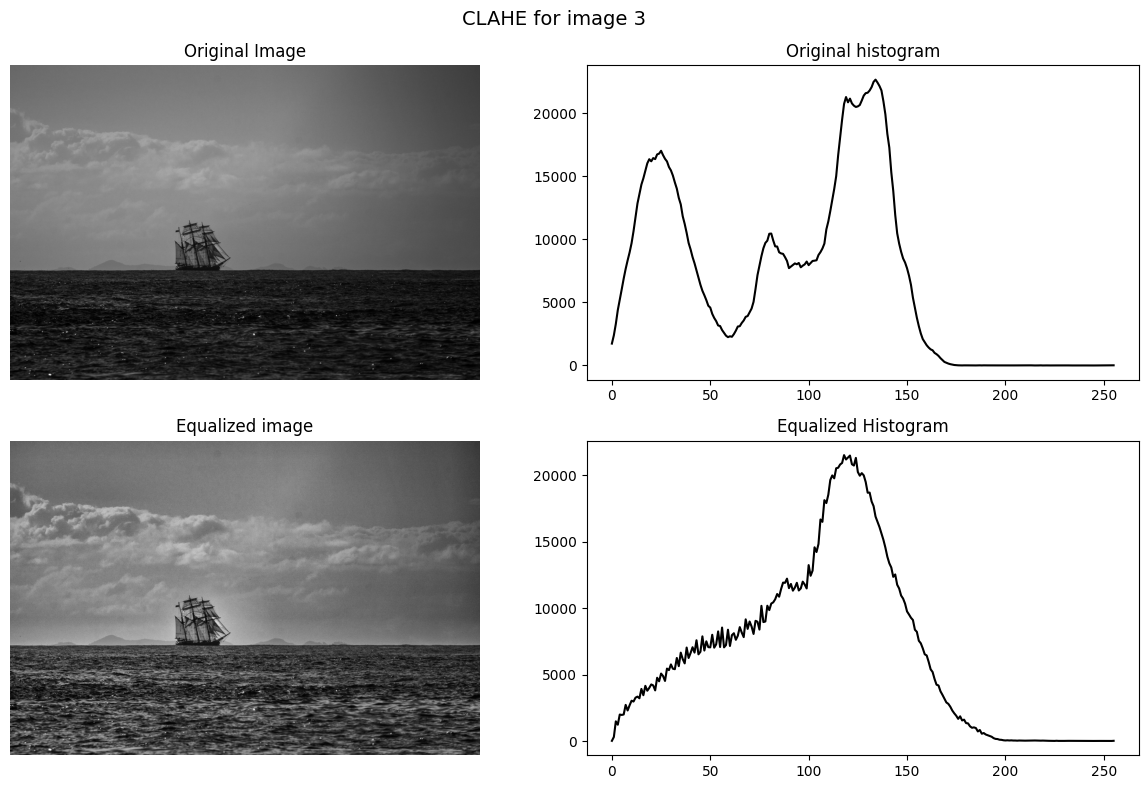

In [25]:
image = cv2.imread(os.path.join(IMAGES_FOLDER, "image_3_grayscale.png"), cv2.IMREAD_GRAYSCALE)
show_grayscale_equalization_hist_comparison(
    image,
    title="CLAHE for image 3",
    hist_equalization_fn=lambda img: clahe_grayscale(img, clip_limit=2.0, tileGridSize=(8, 8))
)

### Color image processing 